<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/CAPM_Capital_Asset_Pricing_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPM - Capital Asset Pricing Model 

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 9.1 MB/s 
     |████████████████████████████████| 63 kB 583 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm   
import datetime as dt

import urllib.request       # handle online files
import zipfile            
import os                

import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams["savefig.dpi"] = 500
np.set_printoptions(precision=5, suppress=True, formatter={"float": lambda x: f"{x:6.3f}"})

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#help(stats.linregress)

In [3]:
def get_prices(tickers, freq_p, st_day, end_day):
    mystock = pd.DataFrame()
    for t in tickers:
        mystock[t] = yf.download(t, start=st_day, end=end_day, interval=freq_p)['Adj Close']
    return mystock

In [17]:
tic=['TSLA', 'SPY']
prices= get_prices(tic, freq_p='1wk', st_day="2011-01-01", end_day="2022-05-31")  # id , 1wk, 1mo
print(prices)

prices.rename(columns={"TSLA": "Your_Stock", "SPY":"INDEX"}, inplace=True)

prices.info()
prices.tail(20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  TSLA         SPY
Date                              
2011-01-01    5.648000  102.503983
2011-01-08    5.150000  104.245476
2011-01-15    4.608000  103.495644
2011-01-22    4.802000  102.971611
2011-01-29    4.692000  105.736969
...                ...         ...
2022-04-30  865.650024  411.339996
2022-05-07  769.590027  401.720001
2022-05-14  663.900024  389.630005
2022-05-21  628.159973  393.890015
2022-05-24  628.159973  393.890015

[597 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 597 entries, 2011-01-01 to 2022-05-24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Your_Stock  596 non-null    float64
 1   INDEX       596 non-null    float64
dtypes: float64(2)
memory usage: 14.0 KB


,Your_Stock,INDEX
Date,,
2022-01-15,943.900024,436.623596
2022-01-22,846.349976,440.581299
2022-01-29,923.320007,447.310394
2022-02-05,860.000000,439.095886
2022-02-12,856.979980,432.885193
2022-02-19,809.869995,436.394287
2022-02-26,838.289978,430.831573
2022-03-05,795.349976,418.769043
2022-03-12,905.390015,443.143311


In [18]:
print(prices.isnull().sum())
prices.dropna(how='any', inplace=True)
print(prices.isnull().sum())
prices.info()
print(prices)

Your_Stock    1
INDEX         1
dtype: int64
Your_Stock    0
INDEX         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 596 entries, 2011-01-01 to 2022-05-24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Your_Stock  596 non-null    float64
 1   INDEX       596 non-null    float64
dtypes: float64(2)
memory usage: 14.0 KB
            Your_Stock       INDEX
Date                              
2011-01-01    5.648000  102.503983
2011-01-08    5.150000  104.245476
2011-01-15    4.608000  103.495644
2011-01-22    4.802000  102.971611
2011-01-29    4.692000  105.736969
...                ...         ...
2022-04-30  865.650024  411.339996
2022-05-07  769.590027  401.720001
2022-05-14  663.900024  389.630005
2022-05-21  628.159973  393.890015
2022-05-24  628.159973  393.890015

[596 rows x 2 columns]


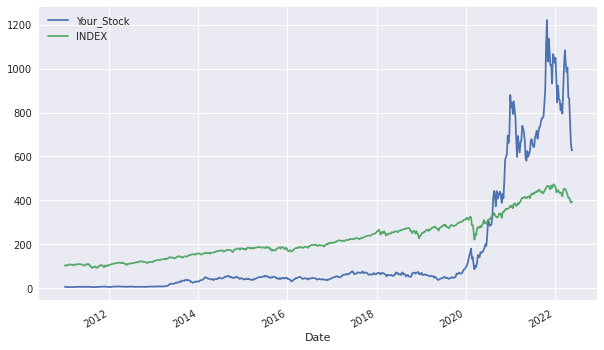

In [19]:
prices.plot(figsize=(10,6))
plt.legend()

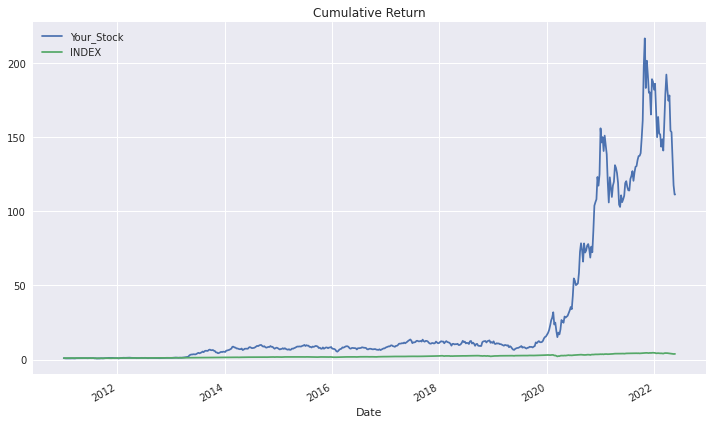

In [20]:
(prices / prices.iloc[0] * 1).plot(figsize=(10, 6), subplots=False)  #cumulative returns
plt.title('Cumulative Return')
plt.tight_layout()

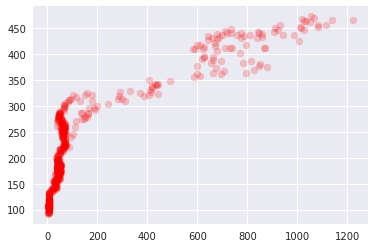

In [21]:
prices.pct_change(1).dropna()
plt.scatter(prices['Your_Stock'], prices['INDEX'], color = 'red', alpha=0.2)

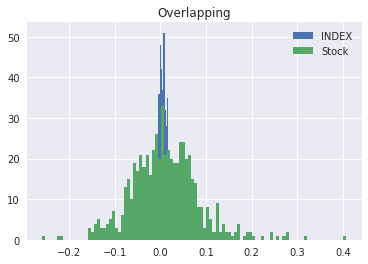

In [23]:
returns = prices.pct_change(1).dropna()

plt.hist(returns['INDEX'], label='INDEX', bins=100) 
plt.hist(returns['Your_Stock'], label='Stock', bins=100)
  
plt.legend(loc='upper right')
plt.title('Overlapping')
plt.show()

In [24]:
returns

,Your_Stock,INDEX
Date,,
2011-01-08,-0.088173,0.016990
2011-01-15,-0.105243,-0.007193
2011-01-22,0.042101,-0.005063
2011-01-29,-0.022907,0.026856
2011-02-05,-0.008951,0.014945
...,...,...
2022-04-30,-0.005868,-0.001602
2022-05-07,-0.110969,-0.023387
2022-05-14,-0.137333,-0.030096


#using scipy

In [25]:
beta,alpha,r_value,p_value,std_err = stats.linregress(returns['INDEX'],returns["Your_Stock"])

In [26]:
print(beta.round(4))
print(alpha.round(4))
print(r_value.round(2))
print(p_value.round(4))

1.5298
0.0069
0.45
0.0


#using statsmodels

In [27]:
formula = 'Your_Stock ~ INDEX'
results = smf.ols(formula, returns).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Your_Stock   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     148.5
Date:                Wed, 25 May 2022   Prob (F-statistic):           1.19e-30
Time:                        02:20:48   Log-Likelihood:                 756.20
No. Observations:                 595   AIC:                            -1508.
Df Residuals:                     593   BIC:                            -1500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0069      0.003      2.462      0.0

#using scikit-learn
You need to take a look at the shape of the data you are feeding into .fit().

Here x.shape = (10,) but we need it to be (10, 1), see sklearn. Same goes for y. So we reshape:

In [28]:
X = returns.loc[:, ['INDEX']].values

In [29]:
y = returns.loc[:, ['Your_Stock']].values

In [30]:
X.shape

(595, 1)

In [31]:
type(X)

numpy.ndarray

In [32]:
X.dtype

dtype('float64')

In [33]:
y.shape

(595, 1)

In [34]:
reg = LinearRegression(fit_intercept=True).fit(X,y)

In [35]:
reg.predict(X[0].reshape(-1,1))

array([[ 0.033]])

In [36]:
reg.predict(X[0:10])

array([[ 0.033],
       [-0.004],
       [-0.001],
       [ 0.048],
       [ 0.030],
       [ 0.023],
       [-0.018],
       [ 0.009],
       [-0.012],
       [-0.029]])

In [37]:
score = reg.score(X, y)
print(score)

0.20031258510930994


In [38]:
reg.coef_

array([[ 1.530]])

In [39]:
reg.intercept_

array([ 0.007])

In [40]:
m = reg.coef_[0,0]
b = reg.intercept_[0]

In [41]:
m

1.5298147401150073

In [42]:
b

0.006907360139713001

In [43]:
# following slope intercept form 
print("formula: y = {:.4f}X + {:.4f}".format(m, b) )

formula: y = 1.5298X + 0.0069


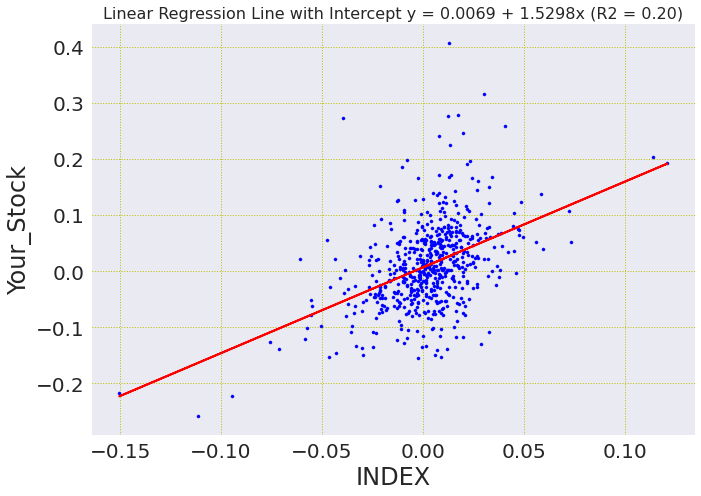

In [57]:
from numpy.ma.core import flatten_structured_array
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='blue', s=10);
ax.plot(X, reg.predict(X), color='red',linewidth=2);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'y')
ax.tick_params(labelsize = 20)
ax.set_xlabel('INDEX', fontsize = 24)
ax.set_ylabel('Your_Stock', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.4f} + {:.4f}x (R2 = {:.2f})".format(b, m, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)